**Microdados de Matrículas - SME-SP** <br>
1) Arrumando formato das colunas de data (DT_IN_MAT e DT_FIM_MAT) <br>
2) Selecionando data específica (31/03/2018) <br>
3) Agrupando por turma e perfil de deficiência

In [8]:
# Importando bibliotecas: Pandas como pd, Numpy como np e Matplotlib como plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [24]:
# Definindo colunas que serão importadas
colunas = ["CD_UNIDADE_EDUCACAO","NOME_DISTRITO", "CD_SETOR", "TIPO_ESCOLA",
                          "NOME_ESCOLA", "DRE", "CD_INEP_ESCOLA", "SITUACAO_ESCOLA", "CD_TURMA",
                          "CD_TURNO",  "DESC_TURNO", "CD_SERIE", "DESC_SERIE",
                          "MODALIDADE", "MODALIDADE_SEGMENTO", "TURMA_ESCOL",
                          "NOME_TURMA", "HORA_IN_TURMA", "HORA_FIM_TURMA",
                          "DESC_PERIODICIDADE_TURMA", "CD_ETAPA_ENSINO", "DESC_ETAPA_ENSINO",
                          "CD_CICLO_ENSINO", "DESC_CICLO_ENSINO", "CD_TIPO_TURMA",
                          "DESC_TIPO_TURMA", "CD_TIPO_PROGRAMA", "DESC_TIPO_PROGRAMA",
                          "DUR_DIA_TURMA", "DUR_DIA_HORA", "DUR_DIA_MIN",
                          "DUR_SEMAN_TURMA", "DUR_SEM_HORA", "DUR_SEM_MIN", "QTD_DIAS_SEMAN_TURMA",
                          "X_SEMANA", "SEG", "TER", "QUA", "QUI", "SEX", "SAB", "DOM", "CD_ALUNO_SME", "NEE_ALT_HAB",
                          "DEF__AUTISMO", "DEF__SURDEZ_LEVE", "DEF__SURDEZ_SEV",
                          "DEF__INTELECT", "DEF__MULTIPLA", "DEF__CEGUEIRA",
                          "DEF__BAIXA_VISAO", "DEF__SURDO_CEG", "DEF__TRANST_DES_INF",
                          "DEF__SINDR_ASPER", "DEF__SINDR_RETT", "DEF__FIS_N_CADEIR",
                          "DEF__FIS_CADEIR", "DEF__N_POSSUI", "DT_IN_MAT", "DT_FIM_MAT"]

In [25]:
# Lendo arquivo de Matrículas (com colunas específicas)
df = pd.read_csv("Microdados_EOL_Matriculas_2018.csv", sep = "|", usecols= colunas, encoding = "unicode_escape")

In [26]:
# Retirando espaços vazios (" ") que estão sobrando em todo o DataFrame
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [27]:
# Transformando formato da variável em data
df['DT_IN_MAT'] = pd.to_datetime(df.DT_IN_MAT)
df['DT_FIM_MAT'] = pd.to_datetime(df.DT_FIM_MAT)

In [28]:
# Definindo data a ser analisada
ts = pd.to_datetime('5/31/2018')

In [29]:
# Definindo período a ser analisado
df = df.loc[df.DT_IN_MAT <= ts, :]
df = df.loc[df.DT_FIM_MAT >= ts, :]

In [29]:
# Selecionando escolas ATIVAS
# df = df.loc[df['SITUACAO_ESCOLA'] == 'ATIVA']

In [80]:
# Quantidade de alunos ÚNICOS da Educação Especial
df2 = df.groupby('DEF__N_POSSUI').CD_ALUNO_SME.nunique().to_frame('Contagem').reset_index()
df2[df2.DEF__N_POSSUI == 0]

,DEF__N_POSSUI,Contagem
0,0,20896


In [81]:
# Quantidade de alunos ÚNICOS da Educação Especial
df2 = df.groupby('DEF__N_POSSUI').CD_ALUNO_SME.nunique().to_frame('Contagem').reset_index()
df2['%'] = (df2['Contagem']/df2['Contagem'].sum()*100).round(1)
df2

,DEF__N_POSSUI,Contagem,%
0,0,20896,2.0
1,1,1043119,98.0


In [ ]:
# Quantidade de alunos ÚNICOS da Educação Especial
df3 = df.groupby(['MODALIDADE','DEF__N_POSSUI']).CD_ALUNO_SME.nunique().to_frame('Contagem').reset_index()
df3.set_index(['MODALIDADE','DEF__N_POSSUI'], inplace = True)
df3['%'] = df3.groupby(level=0).transform(lambda x: (x / x.sum()).round(2))
df3

In [9]:
# Selecionando TIPO_ESCOLA: EMEF, CEU EMEF, EMEI e CEU EMEI
df2 = df.loc[(df['TIPO_ESCOLA'] == 'EMEF') | (df['TIPO_ESCOLA'] == 'CEU EMEF') | 
            (df['TIPO_ESCOLA'] == 'EMEI') | (df['TIPO_ESCOLA'] == 'CEU EMEI')]

In [10]:
# Selecionando MODALIDADE: FUND e PRE
df2 = df2.loc[(df2['MODALIDADE'] == 'FUND') | (df2['MODALIDADE'] == 'PRE')]

In [11]:
# Contando quantas turmas estavam em escolas Ativas
df2.groupby('SITUACAO_ESCOLA').count()

,CD_UNIDADE_EDUCACAO,NOME_DISTRITO,CD_SETOR,TIPO_ESCOLA,NOME_ESCOLA,DRE,CD_INEP_ESCOLA,CD_TURMA,CD_TURNO,DESC_TURNO,...,DEF__BAIXA_VISAO,DEF__SURDO_CEG,DEF__TRANST_DES_INF,DEF__SINDR_ASPER,DEF__SINDR_RETT,DEF__FIS_N_CADEIR,DEF__FIS_CADEIR,DEF__N_POSSUI,DT_IN_MAT,DT_FIM_MAT
SITUACAO_ESCOLA,,,,,,,,,,,,,,,,,,,,,
ATIVA,634970,634970,634970,634970,634970,634970,634970,634970,634970,634970,...,634970,634970,634970,634970,634970,634970,634970,634970,634970,634970


In [12]:
# Definindo colunas que serão agrupadas
colunas_agrupadas = ["CD_TURMA", "TIPO_ESCOLA", "NEE_ALT_HAB", 
                          "DEF__AUTISMO", "DEF__SURDEZ_LEVE", "DEF__SURDEZ_SEV",
                          "DEF__INTELECT", "DEF__MULTIPLA", "DEF__CEGUEIRA",
                          "DEF__BAIXA_VISAO", "DEF__SURDO_CEG", "DEF__TRANST_DES_INF",
                          "DEF__SINDR_ASPER", "DEF__SINDR_RETT", "DEF__FIS_N_CADEIR",
                          "DEF__FIS_CADEIR", "DEF__N_POSSUI"]

In [13]:
# Agrupando, contando, nomeando a contagem e transformando tudo em um novo DataFrame
df3 = df2.groupby(colunas_agrupadas).size().to_frame('Contagem').reset_index()

In [15]:
df3.head()

,CD_TURMA,TIPO_ESCOLA,NEE_ALT_HAB,DEF__AUTISMO,DEF__SURDEZ_LEVE,DEF__SURDEZ_SEV,DEF__INTELECT,DEF__MULTIPLA,DEF__CEGUEIRA,DEF__BAIXA_VISAO,DEF__SURDO_CEG,DEF__TRANST_DES_INF,DEF__SINDR_ASPER,DEF__SINDR_RETT,DEF__FIS_N_CADEIR,DEF__FIS_CADEIR,DEF__N_POSSUI,Contagem
0,1861353,EMEF,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,30
1,1861354,EMEF,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,29
2,1861355,EMEF,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,27
3,1861355,EMEF,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
4,1861356,EMEF,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,30


**.size()** do DataFrameGroupBy retorna um objeto tipo Série, não um DataFrame. <br>
**.to_frame()** transforma apenas a coluna .size() em DataFrame. Obs: Pode-se nomear a coluna colocando o nome dentro do argumento. <br>
**.reset_index()** transforma em um DataFrame com todos as colunas originais + a de contagem.<br>
https://stackoverflow.com/questions/17995024/how-to-assign-a-name-to-the-a-size-column

In [161]:
# Verificando o total de alunos com deficiência
df5 = df2.groupby("DEF__N_POSSUI")["Contagem"].sum().to_frame('Contagem').reset_index()

In [162]:
df5['%']= (df5['Contagem']/df5['Contagem'].sum()*100).round(1)

In [163]:
df5

,DEF__N_POSSUI,Contagem,%
0,0,15313,2.4
1,1,619657,97.6


In [113]:
# Contando quantidade de Turmas (únicas)
df2["CD_TURMA"].value_counts().count()

21176

In [134]:
# Verificando a média de PcD e ñ-PcD por TURMA
df2.groupby("DEF__N_POSSUI")["Contagem"].mean().round(1)

DEF__N_POSSUI
0     1.1
1    29.3
Name: Contagem, dtype: float64

In [147]:
# Verificando a média de alunos por TURMA (contando todos)
format(df2.groupby("CD_TURMA")["Contagem"].sum().mean(),'.1f')

'30.0'

In [132]:
# Criando base de alunos por TURMA por TIPO_ESCOLA (contando todos)
df3 = df2.groupby(["CD_TURMA", "TIPO_ESCOLA"])["Contagem"].sum().to_frame('Contagem').reset_index()

In [133]:
# Verificando a média de alunos por TURMA por TIPO_ESCOLA (contando todos)
df3.groupby(["TIPO_ESCOLA"])["Contagem"].mean().round(1)

TIPO_ESCOLA
CEU EMEF    30.5
CEU EMEI    32.4
EMEF        29.2
EMEI        31.3
Name: Contagem, dtype: float64

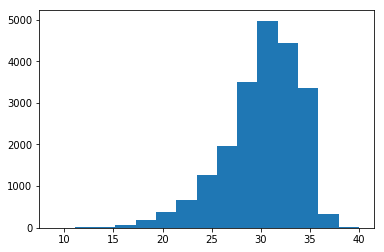

In [122]:
histogram_example = plt.hist(df3['Contagem'], bins=15)
plt.show()